In [215]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [216]:
data = pd.read_csv('D:/Yogabar/Solution/data/review_text_data.csv')

In [217]:
data.head()

,reviews
0,\r\n\r\n It's very tasty and affordable and filled with all the goodies needed for your diet\r\n\r\n
1,"\r\n\r\n I really want to applaud the ppl at yogabar who come up with such great combinations, the perfect taste, they have mastered the art of what will taste the best with what. I’m so happy with all the ingredients and how they complement each other and taste great with milk/yoghurt! Best buy!\r\n\r\n"
2,"\r\n\r\n Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover, loved it and it has all berries which gives awesome taste. All healthy ingredients like oats, brown rice flakes, raisins, cranberries, apricots. Black currants ,quinoa, pumpkin, chia and flax seeds, this is a combined mixture of all healthy foods. Just 200 calories and I am sorted in morning. Tastes best with cold milk. Even it makes a great dry snacking option anytime during the day. Perfect when you are on balanced diet and will recommend you all to give it a try.\r\n\r\n"
3,"\r\n\r\n I'm a big fan of Yogabar range of Mueslis and order them frequently. I decided to buy the 700 gm super saver pack when it was cheaper during the great Indian sale. Got it for Rs 349. However, the pack was full of lumps rather than the usual consistency. It was really annoying as it altered the taste a lot. All the lumps were overtly sweet and rest of the muesli was dry and tasteless. Moreover, they didn't dissolve in milk and by the time it did, the rest of the cereal got soggy. I really hope it was a one time thing and won't happen again in the future. I'm still waiting to hear from Yogabars.Hope this review is helpful.\r\n\r\n"
4,"\r\n\r\n Quality of product has deteriorated badly. The two boxes I purchased got ""burnt grains"". Also some of the seeds float when milk is put, meaning the company is now using expired items. Even the rasins are put like lump of balls...Only thing that is good is the packing... not the actual product.Anyway, this company planned that they will initially gain customer confidence, get good rating and later give 3rd class product.Very disappointing...\r\n\r\n"


In [218]:
df = data.copy()
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [219]:
df.size

869

In [220]:
df.drop_duplicates(subset = "reviews", keep = False, inplace = True) 

In [221]:
df.size

770

In [222]:
import nltk
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer

In [223]:
import string   
import re

In [224]:
def remove_punct_emoji(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text.encode('ascii', 'ignore').decode('ascii')

df['reviews_punct'] = df['reviews'].apply(lambda x: remove_punct_emoji(x))

In [225]:
def tokenize(text):
    text = re.split('\W+', text)
    return text

df['reviews_tokenized'] = df['reviews_punct'].apply(lambda x: tokenize(x.lower()))

In [226]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['reviews_nonstop'] = df['reviews_tokenized'].apply(lambda x: remove_stopwords(x))

In [227]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['reviews_stemmed'] = df['reviews_nonstop'].apply(lambda x: stemming(x))

In [228]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed
24,"Good Product! At Very Reasonable rate! With the healthy Food!Morning breakfast is now easy with this delicious crunchy muesli. Me being a fruits and nuts lover, loved it and it has all berries which gives awesome taste. All healthy ingredients like oats, brown rice flakes, raisins, cranberries, apricots. Black currants ,quinoa, pumpkin, chia and flax seeds, this is a combined mixture of all healthy foods. Just 200 calories and I am sorted in morning. Tastes best with cold milk. Even it makes a great dry snacking option anytime during the day. Perfect when you are on balanced diet and will recommend you all to give it a try to loose weight!PLease go ahead without a second thought.",Good Product At Very Reasonable rate With the healthy FoodMorning breakfast is now easy with this delicious crunchy muesli Me being a fruits and nuts lover loved it and it has all berries which gives awesome taste All healthy ingredients like oats brown rice flakes raisins cranberries apricots Black currants quinoa pumpkin chia and flax seeds this is a combined mixture of all healthy foods Just calories and I am sorted in morning Tastes best with cold milk Even it makes a great dry snacking option anytime during the day Perfect when you are on balanced diet and will recommend you all to give it a try to loose weightPLease go ahead without a second thought,"[, good, product, at, very, reasonable, rate, with, the, healthy, foodmorning, breakfast, is, now, easy, with, this, delicious, crunchy, muesli, me, being, a, fruits, and, nuts, lover, loved, it, and, it, has, all, berries, which, gives, awesome, taste, all, healthy, ingredients, like, oats, brown, rice, flakes, raisins, cranberries, apricots, black, currants, quinoa, pumpkin, chia, and, flax, seeds, this, is, a, combined, mixture, of, all, healthy, foods, just, calories, and, i, am, sorted, in, morning, tastes, best, with, cold, milk, even, it, makes, a, great, dry, snacking, option, anytime, during, the, day, perfect, when, you, are, on, balanced, diet, and, will, ...]","[, good, product, reasonable, rate, healthy, foodmorning, breakfast, easy, delicious, crunchy, muesli, fruits, nuts, lover, loved, berries, gives, awesome, taste, healthy, ingredients, like, oats, brown, rice, flakes, raisins, cranberries, apricots, black, currants, quinoa, pumpkin, chia, flax, seeds, combined, mixture, healthy, foods, calories, sorted, morning, tastes, best, cold, milk, even, makes, great, dry, snacking, option, anytime, day, perfect, balanced, diet, recommend, give, try, loose, weightplease, go, ahead, without, second, thought]","[, good, product, reason, rate, healthi, foodmorn, breakfast, easi, delici, crunchi, muesli, fruit, nut, lover, love, berri, give, awesom, tast, healthi, ingredi, like, oat, brown, rice, flake, raisin, cranberri, apricot, black, currant, quinoa, pumpkin, chia, flax, seed, combin, mixtur, healthi, food, calori, sort, morn, tast, best, cold, milk, even, make, great, dri, snack, option, anytim, day, perfect, balanc, diet, recommend, give, tri, loos, weightpleas, go, ahead, without, second, thought]"
457,"Healthy mix of ingredients, decent flavor, overall a good option for ready made breakfast.",Healthy mix of ingredients decent flavor overall a good option for ready made breakfast,"[, healthy, mix, of, ingredients, decent, flavor, overall, a, good, option, for, ready, made, breakfast]","[, healthy, mix, ingredients, decent, flavor, overall, good, option, ready, made, breakfast]","[, healthi, mix, ingredi, decent, flavor, overal, good, option, readi, made, breakfast]"
213,"This has become my go to serial. Whenever I feel hungry and feel like eating junk food, I immediately open the box and eat it with some milk. Love the taste, flavour.",This has become my go to serial Whenever I feel hungry and feel like eating junk food I immediately open the box and eat it with some milk Love the taste flavour,"[, this, has, be

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [231]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [232]:
def compound_score(text):
    comp = sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [233]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [234]:
df['sentiment_score'] = df['reviews'].apply(lambda x:compound_score(x))

In [235]:
df['review_category'] = df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [236]:
df.sample(10)

,reviews,reviews_punct,reviews_tokenized,reviews_nonstop,reviews_stemmed,sentiment_score,review_category
300,Not atleast content shown on package berries are in pacakage,Not atleast content shown on package berries are in pacakage,"[, not, atleast, content, shown, on, package, berries, are, in, pacakage]","[, atleast, content, shown, package, berries, pacakage]","[, atleast, content, shown, packag, berri, pacakag]",0.0000,neutral
638,Loved it as its full of nuts & seeds,Loved it as its full of nuts seeds,"[, loved, it, as, its, full, of, nuts, seeds]","[, loved, full, nuts, seeds]","[, love, full, nut, seed]",0.3818,positive
558,Loved it!,Loved it,"[, loved, it]","[, loved]","[, love]",0.6360,positive
853,Taste is great,Taste is great,"[, taste, is, great]","[, taste, great]","[, tast, great]",0.6249,positive
443,Too much of flat rice....and hardly nuts,Too much of flat riceand hardly nuts,"[, too, much, of, flat, riceand, hardly, nuts]","[, much, flat, riceand, hardly, nuts]","[, much, flat, riceand, hardli, nut]",-0.2516,negative
128,"Delicious bar that contains everything you need to keep healthy and fit. Protein bars are a great way of supplying your body with protein, carbohydrates, fiber, vitamins, minerals and are perfect replacement of normal meals. ... Protein bars are perfect mix of delicious flavors and superior nutrients.",Delicious bar that contains everything you need to keep healthy and fit Protein bars are a great way of supplying your body with protein carbohydrates fiber vitamins minerals and are perfect replacement of normal meals Protein bars are perfect mix of delicious flavors and superior nutrients,"[, delicious, bar, that, contains, everything, you, need, to, keep, healthy, and, fit, protein, bars, are, a, great, way, of, supplying, your, body, with, protein, carbohydrates, fiber, vitamins, minerals, and, are, perfect, replacement, of, normal, meals, protein, bars, are, perfect, mix, of, delicious, flavors, and, superior, nutrients]","[, delicious, bar, contains, everything, need, keep, healthy, fit, protein, bars, great, way, supplying, body, protein, carbohydrates, fiber, vitamins, minerals, perfect, replacement, normal, meals, protein, bars, perfect, mix, delicious, flavors, superior, nutrients]","[, delici, bar, contain, everyth, need, keep, healthi, fit, protein, bar, great, way, suppli, bodi, protein, carbohydr, fiber, vitamin, miner, perfect, replac, normal, meal, protein, bar, perfect, mix, delici, flavor, superior, nutrient]",0.9810,positive
237,A very nice healthy breakfast/snack/dinner product,A very nice healthy breakfastsnackdinner product,"[, a, very, nice, healthy, breakfastsnackdinner, product]","[, nice, healthy, breakfastsnackdinner, product]","[, nice, healthi, breakfastsnackdinn, product]",0.7245,positive
569,It’s yummy my kids enjoy it.,Its yummy my kids enjoy it,"[, its, yummy, my, kids, enjoy, it]","[, yummy, kids, enjoy]","[, yummi, kid, enjoy]",0.7650,positive
574,It's full of seeds.. dry fruits. It's a healthy food.,Its full of seeds dry fruits Its a healthy food,"[, its, full, of, seeds, dry, fruits, its, a, healthy, food]","[, full, seeds, dry, fruits, healthy, food]","[, full, seed, dri, fruit, healthi, food]",0.4019,positive
368,"I won't buy again.. Ingredients are not up to the mark.. Taste & Flavor doesn't has standard.. In this price, we can't expect premium quality..",I wont buy again Ingredients are not up to the mark Taste Flavor doesnt has standard In this price we cant expect premium quality,"[, i, wont, buy, again, ingredients, are, not, up, to, the, mark, taste, flavor, doesnt, has, standard, in, this, price, we, cant, expect, premium, quality]","[, wont, buy, ingredients, mark, taste, flavor, doesnt, standard, price, cant, expect, premium, quality]","[, wont, buy, ingredi, mark, tast, flavor, doesnt, standard, price, cant, expect, premium, qualiti]",0.0000,neutral


(-0.5, 399.5, 199.5, -0.5)

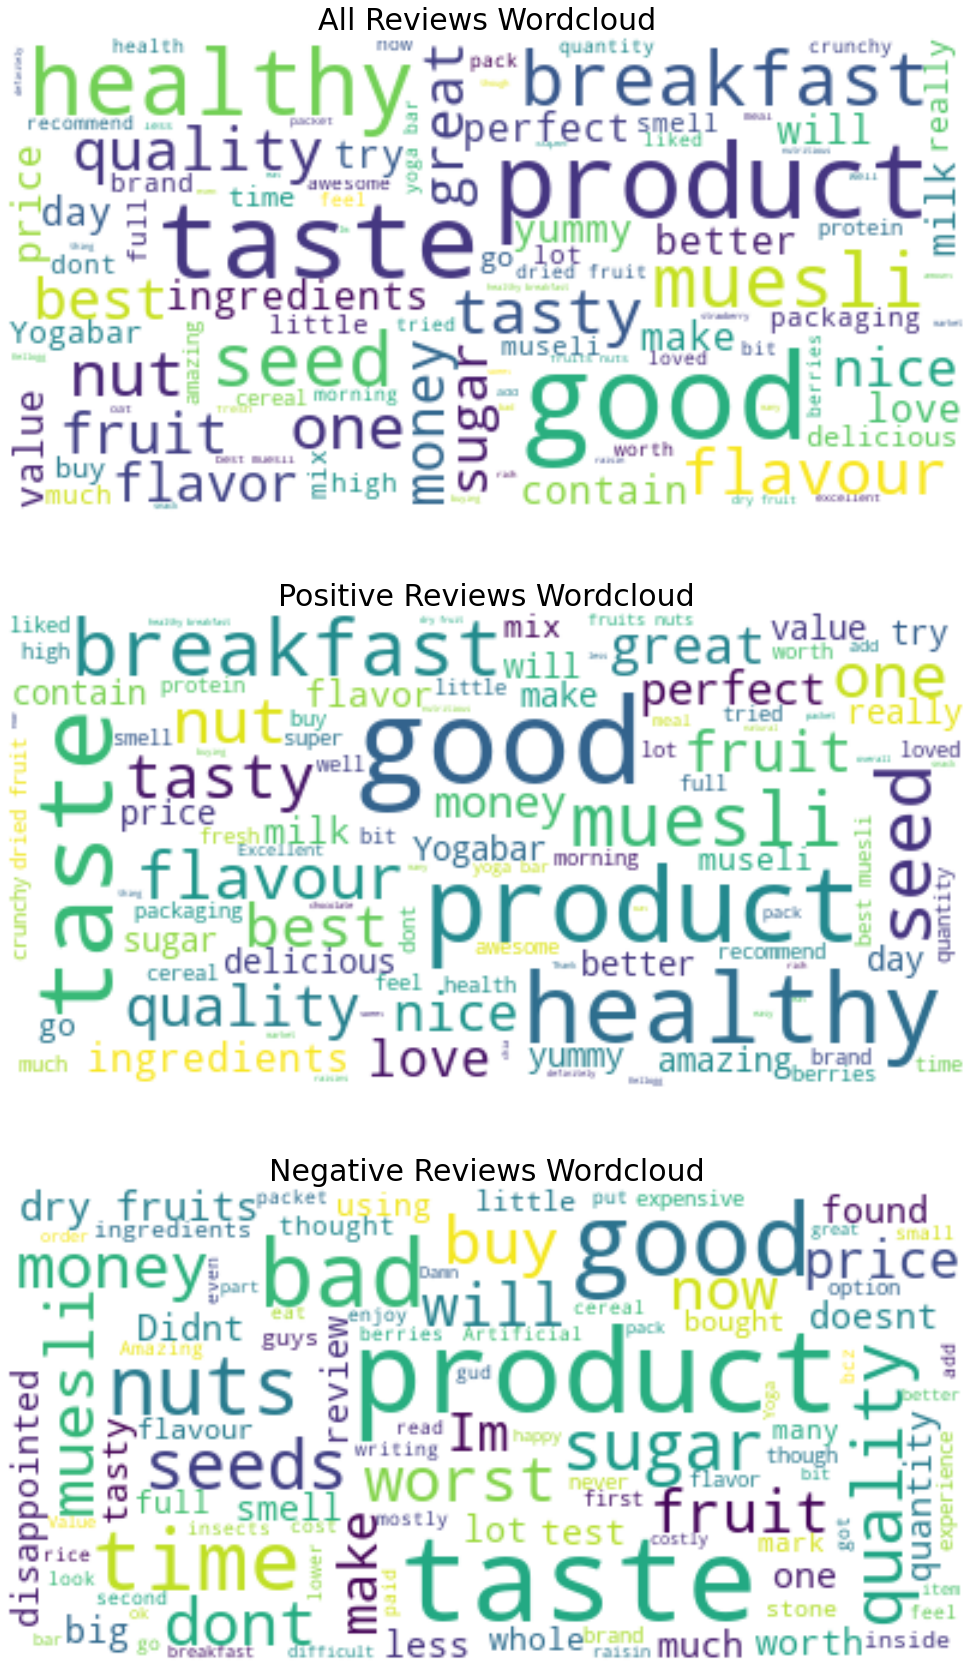

In [237]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Split reviews dataframe (df) to according to positive and negative class
df_positive = df[df['review_category']=='positive']
df_negative = df[df['review_category']=='negative']

# Create Wordcloud strings
reviews_all = " ".join(review for review in df.reviews_punct)
reviews_positive = " ".join(review for review in df_positive.reviews_punct)
reviews_negative = " ".join(review for review in df_negative.reviews_punct)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))

# Generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_all)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_negative)

# Display the generated wordcloud images:
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Reviews Wordcloud', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_positive, interpolation='bilinear')
ax[1].set_title('Positive Reviews Wordcloud',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_negative, interpolation='bilinear')
ax[2].set_title('Negative Reviews Wordcloud',fontsize=30)
ax[2].axis('off')

Text(0.5, 1.0, 'Distribution of Reviews Category')

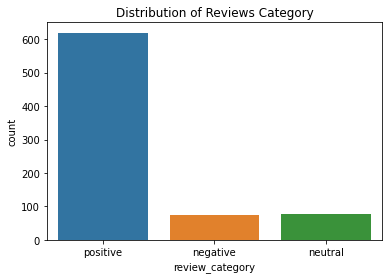

In [238]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")